In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
def clean_path() -> str:
    return '/'.join([
        os.getcwd().replace('src', 'data'),
        'season-data-clean.csv'
    ])

def load_clean() -> pd.DataFrame:
    return pd.read_csv(clean_path())

In [3]:
load_clean().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18362 entries, 0 to 18361
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        18362 non-null  object 
 1   name        18362 non-null  object 
 2   team        18362 non-null  object 
 3   opp         18362 non-null  object 
 4   fpts        18362 non-null  float64
 5   mp          18362 non-null  float64
 6   fppm        18362 non-null  float64
 7   home        18362 non-null  int64  
 8   w           18362 non-null  object 
 9   w_pts       18362 non-null  int64  
 10  l           18362 non-null  object 
 11  l_pts       18362 non-null  int64  
 12  injury      18362 non-null  int64  
 13  starter     18362 non-null  int64  
 14  fg          18362 non-null  int64  
 15  fga         18362 non-null  int64  
 16  fg_perc     18362 non-null  float64
 17  3p          18362 non-null  int64  
 18  3pa         18362 non-null  int64  
 19  3p_perc     18362 non-nul

In [10]:
corr_cols: list[str,...] = ['fpts', 'mp', 'fppm', 'usg', 'fga','pts', 'ast']
corr_df: pd.DataFrame = load_clean()[corr_cols]

corr_df['mp*usg']=corr_df['mp']*corr_df['usg']
corr_cols.append('mp*usg')

corr = corr_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

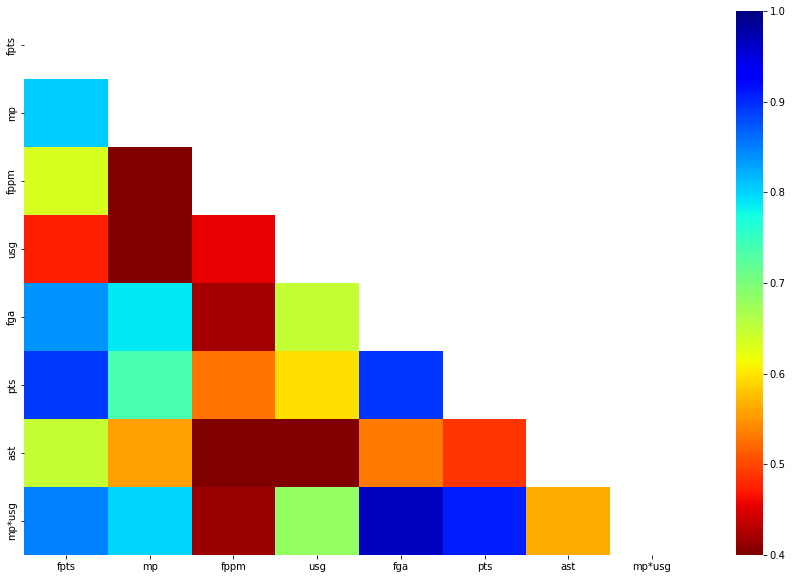

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(
    corr,
    mask=mask,
    cmap='jet_r',
    vmin=0.4,
    vmax=1.0
);